In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('match_events.csv')

In [23]:
matches = df['match_id'].unique()
matches

array([3869685, 3869519, 3857289, 3869117, 3857278, 3857272, 3857270,
       3857262])

In [24]:
# Convert string vars to dictionaries
cols = ['type','play_pattern', 'possession_team', 'team', 'player', 'position']
for col in cols:
  df[col] = df.loc[:,col].apply(lambda x: eval(x) if isinstance(x, str) else x)

In [25]:
# Extract values from .json objects
df['event_name'] = [event['name'] for event in df['type']]
df['play_pattern'] = [play['name'] for play in df['play_pattern']]
df['team'] = [team['name'] for team in df['team']]

# Remove unnecessary columns
df.drop(['Unnamed: 0','index','type','play_pattern', 
              'possession_team', 'out', 'minute', 
              'second', 'carry', 'off_camera', 'clearance'], inplace=True, axis=1)

### Check how many matches each team has

In [78]:
df.groupby(['match_id', 'team']).size()

match_id  team         
3857262   Portugal         2016
          South Korea      1363
3857270   Portugal         2031
          Uruguay          1401
3857272   England          1885
          United States    1634
3857278   Iran             1741
          United States    1855
3857289   Argentina        1910
          Mexico           1465
3869117   Netherlands      1510
          United States    2072
3869519   Argentina        1633
          Croatia          2173
3869685   Argentina        2372
          France           2035
dtype: int64

## Players' impact values throughout the field

In [101]:
# Player Impact DataFrame
pidf = df[['match_id', 'period', 'timestamp', 'duration','location', 'player', 'team', 'event_name']]

In [102]:
pidf.isna().sum()

match_id         0
period           0
timestamp        0
duration      7769
location       293
player         146
team             0
event_name       0
dtype: int64

In [103]:
pidf = pidf.dropna()

In [104]:
pidf['player'] = [p['name'] for p in pidf.loc[:,'player']]
pidf['location'] = pidf['location'].apply(lambda x: x.replace("["," ").replace("]"," ").strip().split(","))
pidf['x'] = [float(loc[0]) for loc in pidf.loc[:,'location']]
pidf['y'] = [float(loc[1]) for loc in pidf.loc[:,'location']]
pidf.drop('location', axis=1, inplace=True)

In [105]:
pidf['timestamp'] = pd.to_datetime(pidf['timestamp'])

In [106]:
pidf

,match_id,period,timestamp,duration,player,team,event_name,x,y
4,3869685,1,2023-05-24 00:00:00.578,0.975702,Antoine Griezmann,France,Pass,61.0,40.1
6,3869685,1,2023-05-24 00:00:01.554,1.170175,Aurélien Djani Tchouaméni,France,Carry,48.0,43.2
7,3869685,1,2023-05-24 00:00:02.724,4.179173,Aurélien Djani Tchouaméni,France,Pass,49.7,43.6
9,3869685,1,2023-05-24 00:00:16.423,1.123351,Nahuel Molina Lucero,Argentina,Pass,22.7,80.0
10,3869685,1,2023-05-24 00:00:17.350,1.533107,Adrien Rabiot,France,Pressure,84.5,8.5
...,...,...,...,...,...,...,...,...,...
29086,3857262,2,2023-05-24 00:51:43.533,0.646452,Moon-Hwan Kim,South Korea,Pass,79.3,75.4
29088,3857262,2,2023-05-24 00:51:44.180,2.126121,Bernardo Mota Veiga de Carvalho e Silva,Portugal,Pass,38.2,7.8
29090,3857262,2,2023-05-24 00:51:46.306,0.000000,André Miguel Valente Silva,Portugal,Duel,68.1,12.9
29091,3857262,2,2023-05-24 00:51:46.306,0.000000,Woo-Young Jung,South Korea,Clearance,52.0,67.2


In [100]:
pidf.to_excel("player_impact_R01.xlsx")

In [ ]:
play_df[play_df['player'].isna() == False]

In [6]:
play_df = play_df[play_df['player'].isna() == False]

In [7]:
play_df['player'] = [player['name'] for player in play_df.loc[:,'player']]
play_df['position'] = [pos['name'] for pos in play_df.loc[:,'position']]

In [8]:
play_df = play_df[['match_id', 'id', 'period', 'timestamp', 'possession',
                   'duration', 'tactics', 'related_events', 'player', 'position',
                   'location', 'pass', 'ball_receipt', 'under_pressure',
                   'counterpress', 'block', 'foul_won', 
                   'duel', 'interception', 'dribble', 'shot', 
                   'goalkeeper', 'ball_recovery', 'foul_committed', 'substitution',
                   '50_50', 'bad_behaviour', 'injury_stoppage',
                   'miscontrol', 'event_name']]

In [9]:
play_df.head()

,match_id,id,period,timestamp,possession,duration,tactics,related_events,player,position,...,shot,goalkeeper,ball_recovery,foul_committed,substitution,50_50,bad_behaviour,injury_stoppage,miscontrol,event_name
4,3869685,f651a6c4-55e3-4e0f-a178-59414ba83d6a,1,2023-05-24 00:00:00.578,2,0.975702,NaN,['97b5dc82-547a-4f93-a632-a2a8daf5ac98'],Antoine Griezmann,Center Attacking Midfield,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass
5,3869685,97b5dc82-547a-4f93-a632-a2a8daf5ac98,1,2023-05-24 00:00:01.554,2,NaN,NaN,['f651a6c4-55e3-4e0f-a178-59414ba83d6a'],Aurélien Djani Tchouaméni,Right Defensive Midfield,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ball Receipt*
6,3869685,9707e590-1d55-4d25-a50f-475019356152,1,2023-05-24 00:00:01.554,2,1.170175,NaN,"['97b5dc82-547a-4f93-a632-a2a8daf5ac98', 'a595...",Aurélien Djani Tchouaméni,Right Defensive Midfield,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Carry
7,3869685,a5956ecc-d637-44d2-8705-e2079e12013e,1,2023-05-24 00:00:02.724,2,4.179173,NaN,['810629a9-ac49-494a-b859-89ef3ff36c57'],Aurélien Djani Tchouaméni,Right Defensive Midfield,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Pass
8,3869685,810629a9-ac49-494a-b859-89ef3ff36c57,1,2023-05-24 00:00:06.903,2,NaN,NaN,['a5956ecc-d637-44d2-8705-e2079e12013e'],Olivier Giroud,Center Forward,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ball Receipt*


In [10]:
play_df.groupby(by=['player', 'location']).count()['shot']

player                           location    
Abolfazl Jalali                  [10.5, 0.1]     0
                                 [101.7, 3.5]    0
                                 [102.0, 0.1]    0
                                 [104.0, 4.6]    0
                                 [107.4, 0.1]    0
                                                ..
Érick Gabriel Gutiérrez Galaviz  [86.8, 2.2]     0
                                 [90.3, 40.3]    0
                                 [91.0, 16.5]    0
                                 [91.9, 39.0]    0
                                 [95.0, 25.5]    0
Name: shot, Length: 20655, dtype: int64

In [11]:
df = play_df[['match_id', 'player', 'location', 'event_name']]

In [12]:
df.head()

,match_id,player,location,event_name
4,3869685,Antoine Griezmann,"[61.0, 40.1]",Pass
5,3869685,Aurélien Djani Tchouaméni,"[48.0, 43.2]",Ball Receipt*
6,3869685,Aurélien Djani Tchouaméni,"[48.0, 43.2]",Carry
7,3869685,Aurélien Djani Tchouaméni,"[49.7, 43.6]",Pass
8,3869685,Olivier Giroud,"[92.7, 11.7]",Ball Receipt*


In [55]:
df.event_name.value_counts()

Pass               8511
Ball Receipt*      7769
Carry              6615
Pressure           2103
Ball Recovery       723
Duel                556
Block               321
Clearance           321
Dribble             259
Foul Committed      237
Miscontrol          227
Goal Keeper         222
Foul Won            219
Shot                182
Dispossessed        168
Dribbled Past       156
Interception        150
Substitution         78
Injury Stoppage      58
50/50                27
Shield               12
Player Off           10
Player On            10
Bad Behaviour         8
Error                 5
Offside               3
Name: event_name, dtype: int64

In [56]:
shot_df = df[df['event_name']=='Shot']

In [57]:
shot_df

,match_id,player,location,event_name
191,3869685,Alexis Mac Allister,"[92.4, 30.0]",Shot
339,3869685,Rodrigo Javier De Paul,"[99.2, 47.9]",Shot
601,3869685,Ángel Fabián Di María Hernández,"[103.1, 34.6]",Shot
770,3869685,Lionel Andrés Messi Cuccittini,"[108.0, 40.0]",Shot
978,3869685,Alexis Mac Allister,"[94.3, 23.5]",Shot
...,...,...,...,...
28337,3857262,Rafael Alexandre Conceição Leão,"[94.1, 55.0]",Shot
28351,3857262,Kang-In Lee,"[88.0, 49.4]",Shot
28554,3857262,João Maria Lobo Alves Palhinha Gonçalves,"[88.8, 40.2]",Shot
28949,3857262,João Pedro Cavaco Cancelo,"[112.1, 25.0]",Shot


In [58]:
df.player.value_counts()

Lionel Andrés Messi Cuccittini     641
Tyler Adams                        631
Rodrigo Javier De Paul             623
Nicolás Hernán Otamendi            591
Enzo Fernandez                     588
                                  ... 
Wout Weghorst                        4
Germán Alejandro Pezzella            3
Mohammad Hossein Kanani Zadegan      1
Matthijs de Ligt                     1
Yu-Min Cho                           1
Name: player, Length: 190, dtype: int64

In [101]:
messi_df = shot_df[shot_df['player']=="Lionel Andrés Messi Cuccittini"]

In [102]:
messi_df

,match_id,player,location,event_name
770,3869685,Lionel Andrés Messi Cuccittini,"[108.0, 40.0]",Shot
2234,3869685,Lionel Andrés Messi Cuccittini,"[109.7, 46.0]",Shot
3388,3869685,Lionel Andrés Messi Cuccittini,"[96.2, 40.9]",Shot
4041,3869685,Lionel Andrés Messi Cuccittini,"[103.6, 55.8]",Shot
4069,3869685,Lionel Andrés Messi Cuccittini,"[116.6, 43.0]",Shot
4390,3869685,Lionel Andrés Messi Cuccittini,"[108.1, 40.1]",Shot
5849,3869519,Lionel Andrés Messi Cuccittini,"[108.0, 40.0]",Shot
6948,3869519,Lionel Andrés Messi Cuccittini,"[112.7, 30.1]",Shot
10081,3857289,Lionel Andrés Messi Cuccittini,"[94.8, 41.9]",Shot
10590,3857289,Lionel Andrés Messi Cuccittini,"[94.9, 37.4]",Shot


In [ ]:
messi_df['location'] = messi_df.loc[:,'location'].apply(lambda x: x.replace('[','').replace(']','') )
messi_df['location'] = messi_df.loc[:,'location'].apply(lambda x: x.split(","))
messi_df['x'] = messi_df.loc[:,'location'].apply(lambda x: float(x[0]))
messi_df['y'] = messi_df.loc[:,'location'].apply(lambda x: float(x[1]))

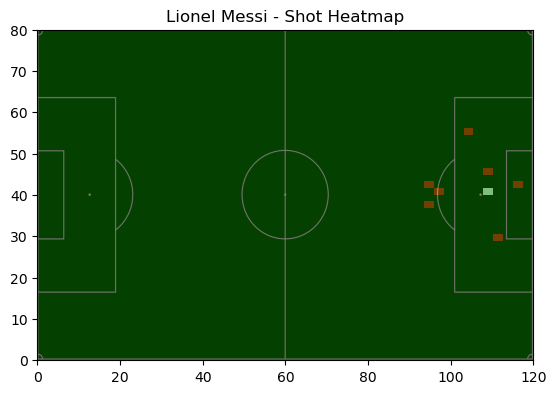

In [123]:
# Define the field dimensions
field_width = 120
field_height = 80

# Create a figure and axis
fig, ax = plt.subplots()

# Load and plot the field image
field_image = plt.imread("soccer_field.png")
ax.imshow(field_image, extent=[0, field_width, 0, field_height])

# Create a heatmap using the shot coordinates
heatmap, xedges, yedges = np.histogram2d(messi_df['x'], messi_df['y'], bins=50, range=[[0, field_width], [0, field_height]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
ax.imshow(heatmap.T, cmap='hot', origin='lower', extent=extent, alpha=0.5)

# Set the title and labels
ax.set_title("Lionel Messi - Shot Heatmap")

# Show the plot
plt.show()


In [ ]:
cr_df = shot_df[shot_df['player']=="Cristiano Ronaldo dos Santos Aveiro"]
cr_df['location'] = cr_df.loc[:,'location'].apply(lambda x: x.replace('[','').replace(']','') )
cr_df['location'] = cr_df.loc[:,'location'].apply(lambda x: x.split(","))
cr_df['x'] = cr_df.loc[:,'location'].apply(lambda x: float(x[0]))
cr_df['y'] = cr_df.loc[:,'location'].apply(lambda x: float(x[1]))

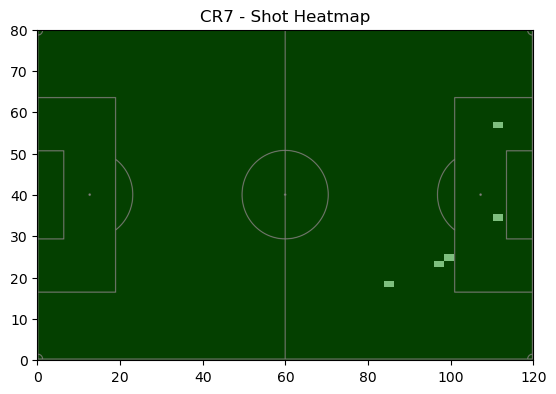

In [124]:
# Create a figure and axis
fig, ax = plt.subplots()

# Load and plot the field image
field_image = plt.imread("soccer_field.png")
ax.imshow(field_image, extent=[0, field_width, 0, field_height])

# Create a heatmap using the shot coordinates
heatmap, xedges, yedges = np.histogram2d(cr_df['x'], cr_df['y'], bins=50, range=[[0, field_width], [0, field_height]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
ax.imshow(heatmap.T, cmap='hot', origin='lower', extent=extent, alpha=0.5)

# Set the title and labels
ax.set_title("CR7 - Shot Heatmap")

# Show the plot
plt.show()

In [ ]:
mbappe_df = shot_df[shot_df['player']=="Kylian Mbappé Lottin"]
mbappe_df['location'] = mbappe_df.loc[:,'location'].apply(lambda x: x.replace('[','').replace(']','') )
mbappe_df['location'] = mbappe_df.loc[:,'location'].apply(lambda x: x.split(","))
mbappe_df['x'] = mbappe_df.loc[:,'location'].apply(lambda x: float(x[0]))
mbappe_df['y'] = mbappe_df.loc[:,'location'].apply(lambda x: float(x[1]))

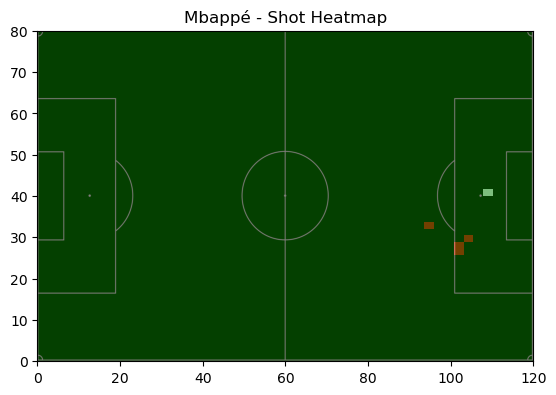

In [130]:
# Create a figure and axis
fig, ax = plt.subplots()

# Load and plot the field image
field_image = plt.imread("soccer_field.png")
ax.imshow(field_image, extent=[0, field_width, 0, field_height])

# Create a heatmap using the shot coordinates
heatmap, xedges, yedges = np.histogram2d(mbappe_df['x'], mbappe_df['y'], bins=50, range=[[0, field_width], [0, field_height]])
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
ax.imshow(heatmap.T, cmap='hot', origin='lower', extent=extent, alpha=0.5)

# Set the title and labels
ax.set_title("Mbappé - Shot Heatmap")

# Show the plot
plt.show()

In [60]:
plays = df.groupby(['player', 'event_name']).size().reset_index(name='count')

In [63]:
top_players = ["Kylian Mbappé Lottin", "Cristiano Ronaldo dos Santos Aveiro", "Lionel Andrés Messi Cuccittini"]

In [65]:
top_plays = plays[plays['player'].isin(top_players)]

In [66]:
cats = plays['event_name'].unique()

In [67]:
cats

array(['50/50', 'Ball Receipt*', 'Ball Recovery', 'Carry', 'Clearance',
       'Dispossessed', 'Dribble', 'Foul Committed', 'Foul Won', 'Pass',
       'Block', 'Dribbled Past', 'Injury Stoppage', 'Interception',
       'Miscontrol', 'Pressure', 'Shot', 'Substitution', 'Player Off',
       'Player On', 'Duel', 'Goal Keeper', 'Shield', 'Error',
       'Bad Behaviour', 'Offside'], dtype=object)

In [69]:
top_plays

,player,event_name,count
318,Cristiano Ronaldo dos Santos Aveiro,Ball Receipt*,76
319,Cristiano Ronaldo dos Santos Aveiro,Ball Recovery,3
320,Cristiano Ronaldo dos Santos Aveiro,Block,1
321,Cristiano Ronaldo dos Santos Aveiro,Carry,37
322,Cristiano Ronaldo dos Santos Aveiro,Dispossessed,2
323,Cristiano Ronaldo dos Santos Aveiro,Dribble,2
324,Cristiano Ronaldo dos Santos Aveiro,Duel,2
325,Cristiano Ronaldo dos Santos Aveiro,Error,1
326,Cristiano Ronaldo dos Santos Aveiro,Foul Won,1
327,Cristiano Ronaldo dos Santos Aveiro,Injury Stoppage,1
